<ipython-input-3-458673ead943>:31: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  dataframe = pd.read_excel('Daywise Solar radiation.xlsx', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,


Epoch 1/10
10/10 - 18s - loss: 0.5094 - 18s/epoch - 2s/step
Epoch 2/10
10/10 - 0s - loss: 0.4846 - 81ms/epoch - 8ms/step
Epoch 3/10
10/10 - 0s - loss: 0.4363 - 88ms/epoch - 9ms/step
Epoch 4/10
10/10 - 0s - loss: 0.2882 - 84ms/epoch - 8ms/step
Epoch 5/10
10/10 - 0s - loss: 0.0734 - 85ms/epoch - 8ms/step
Epoch 6/10
10/10 - 0s - loss: 0.0347 - 93ms/epoch - 9ms/step
Epoch 7/10
10/10 - 0s - loss: 0.0220 - 91ms/epoch - 9ms/step
Epoch 8/10
10/10 - 0s - loss: 0.0157 - 86ms/epoch - 9ms/step
Epoch 9/10
10/10 - 0s - loss: 0.0126 - 84ms/epoch - 8ms/step
Epoch 10/10
10/10 - 0s - loss: 0.0109 - 81ms/epoch - 8ms/step
3/3 [==============================] - 0s 8ms/step
[[771.1779  915.38403 774.53906 ... 730.0016  930.58307 836.3538 ]
 [772.83704 917.1303  776.3783  ... 731.3503  931.9627  837.9649 ]
 [770.6027  914.77924 773.9029  ... 729.53394 930.10406 835.79626]
 ...
 [659.1477  795.58325 651.068   ... 638.46124 836.249   727.85925]
 [675.03595 812.79193 668.1933  ... 651.4836  849.63257 743.1317 ]

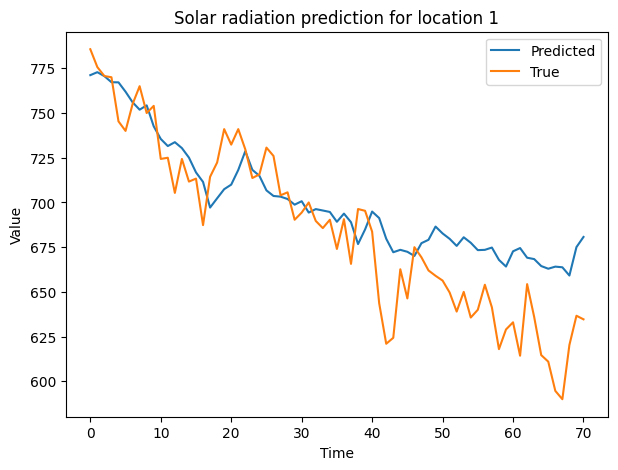

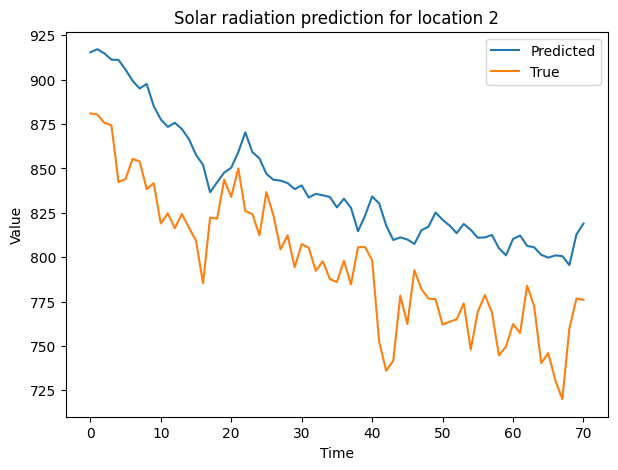

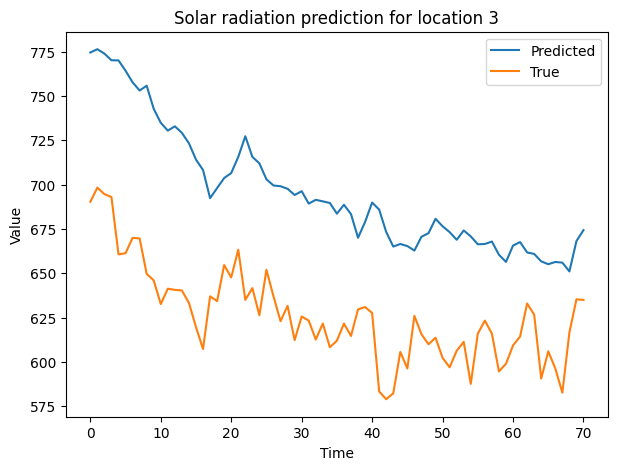

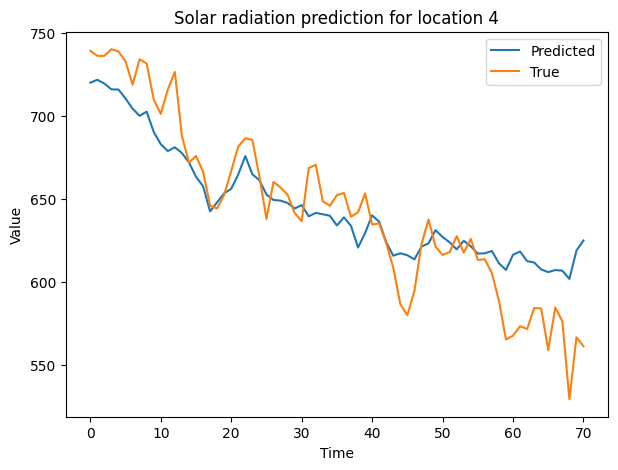

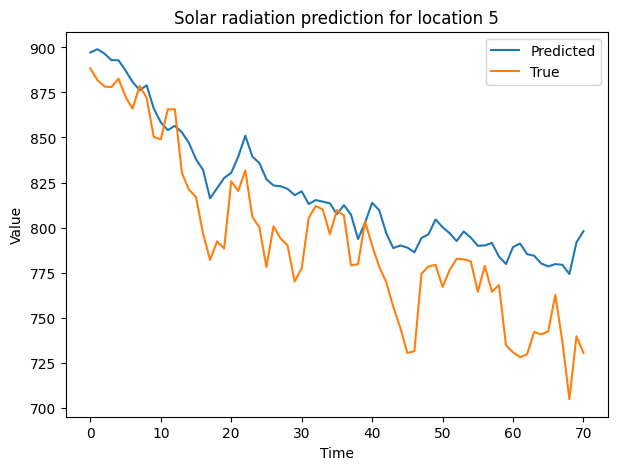

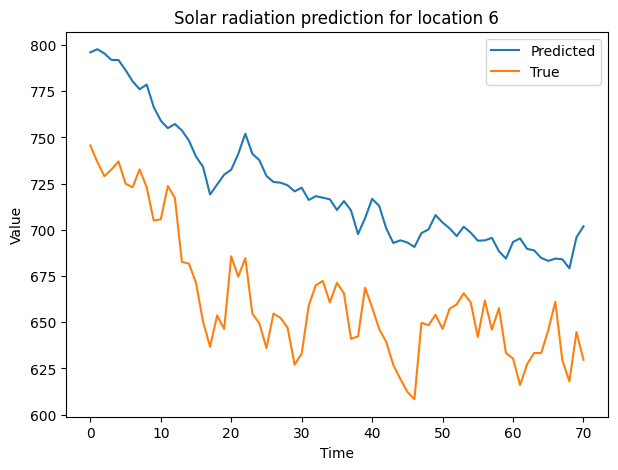

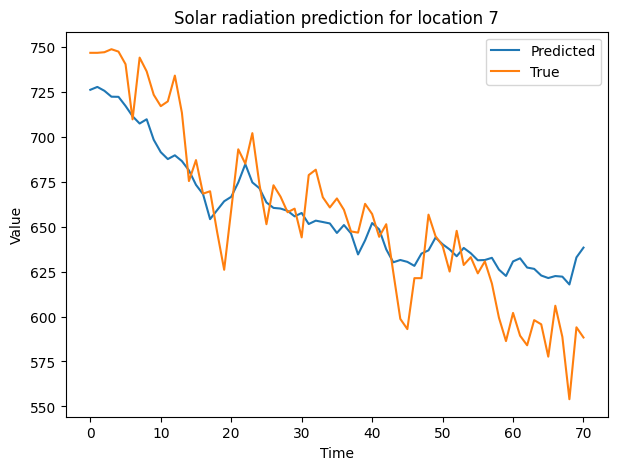

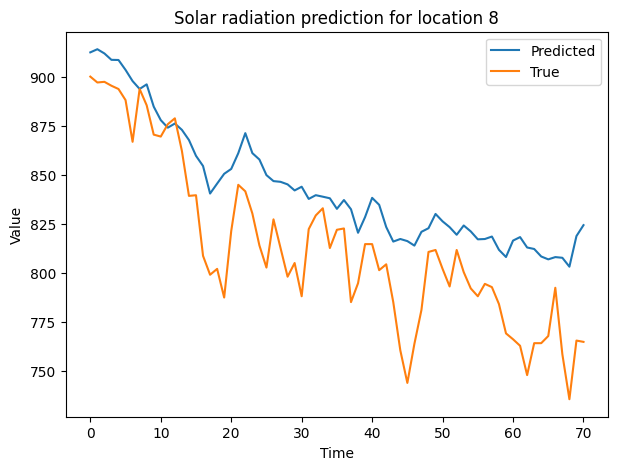

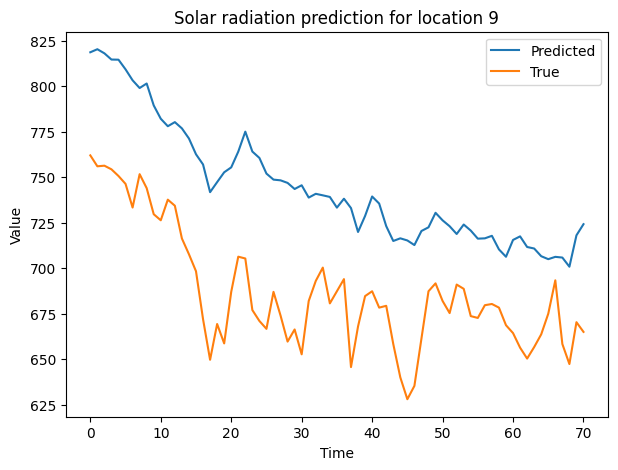

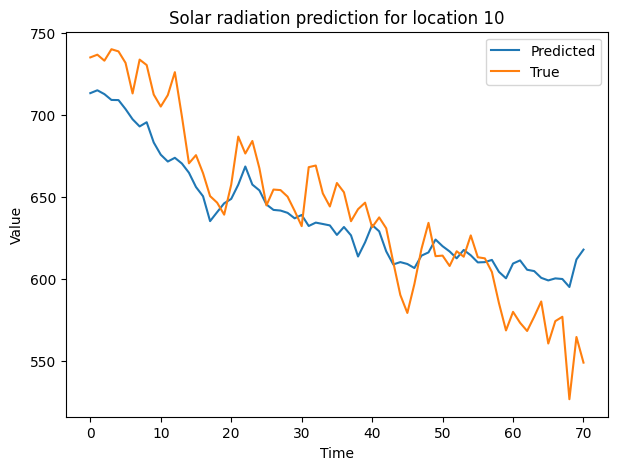

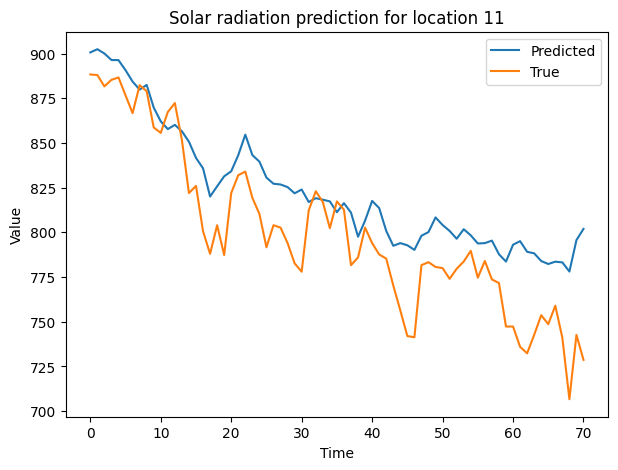

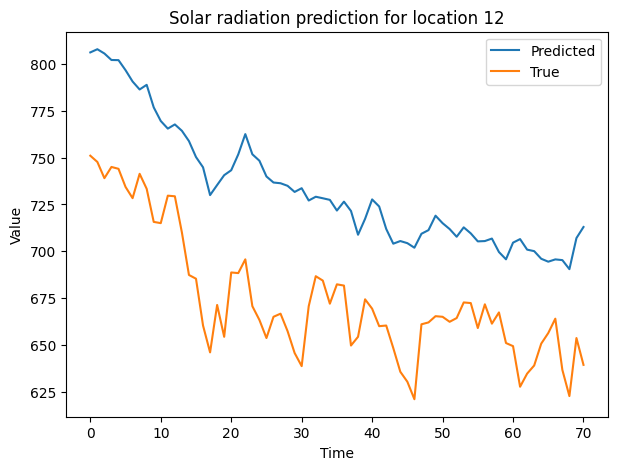

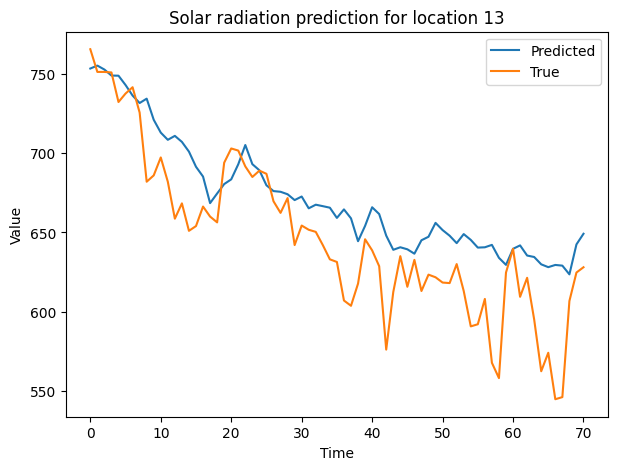

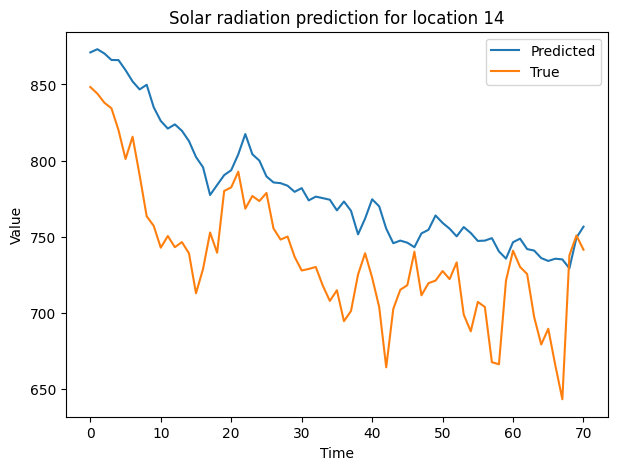

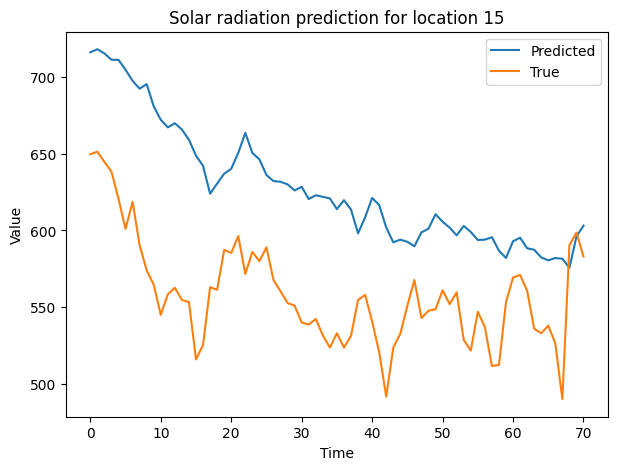

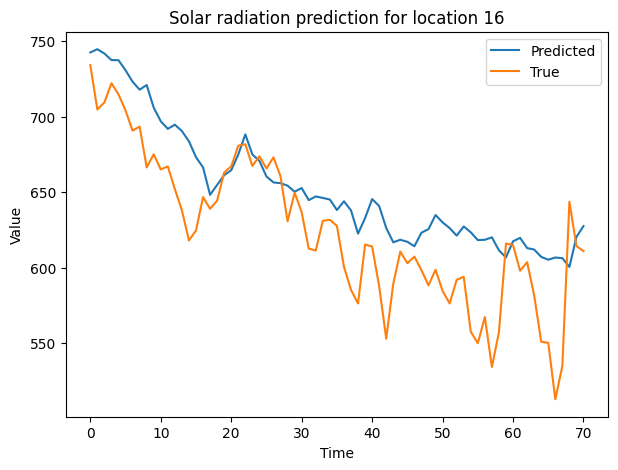

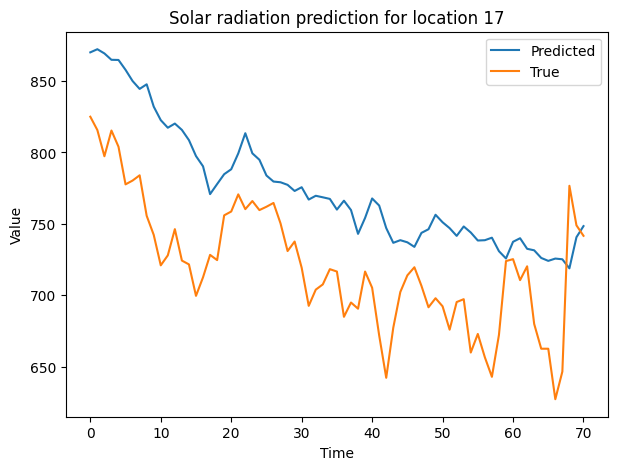

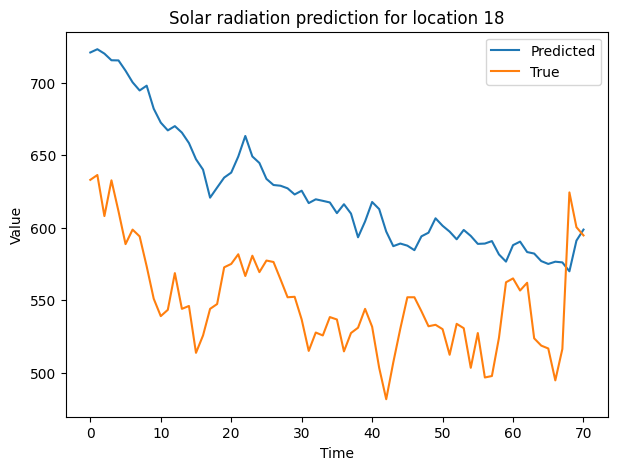

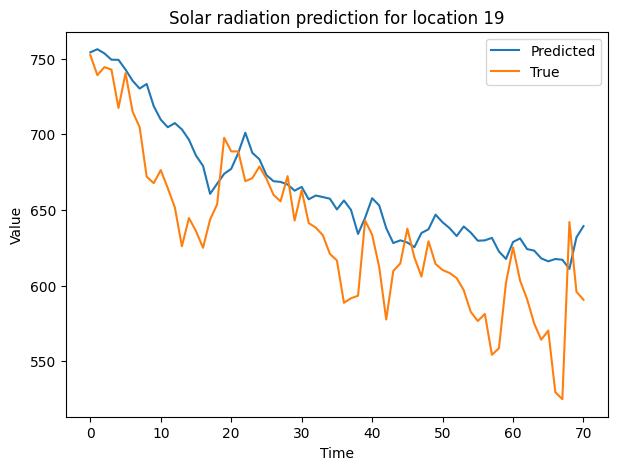

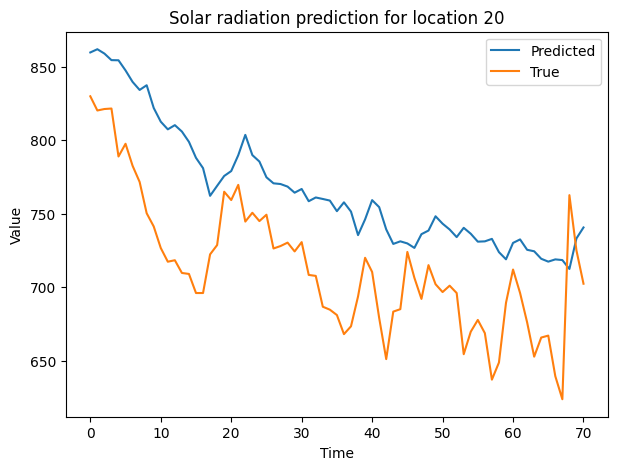

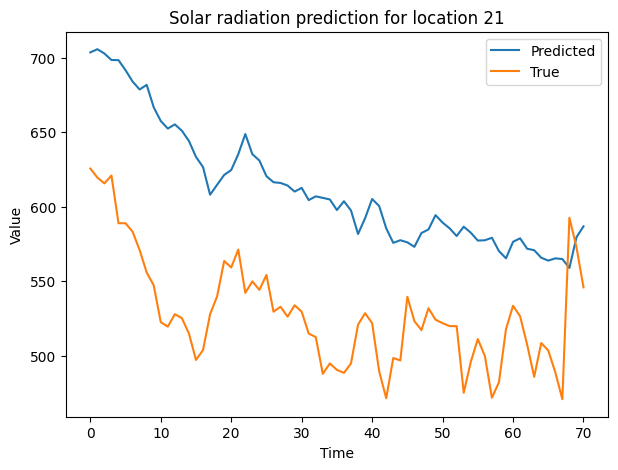

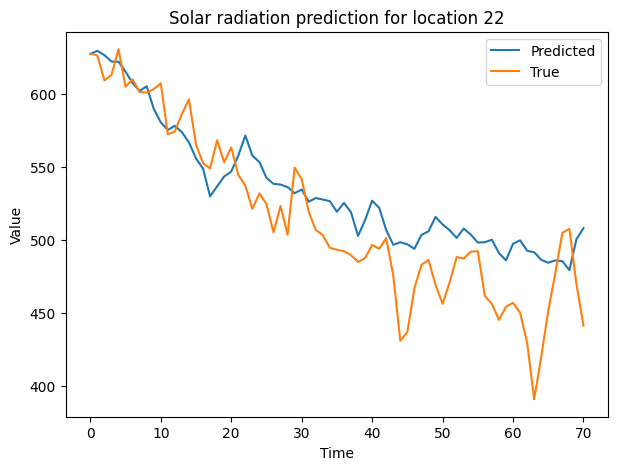

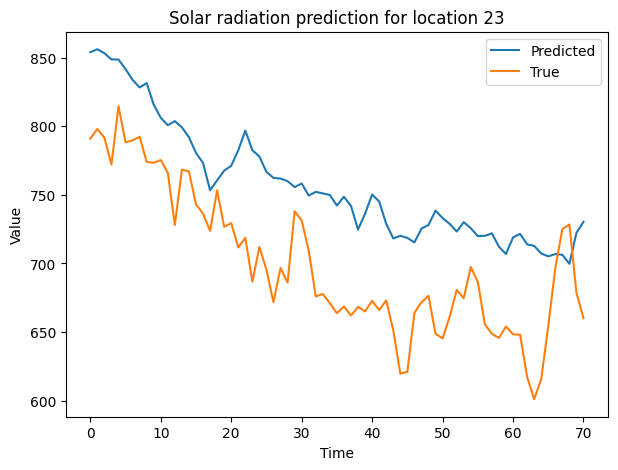

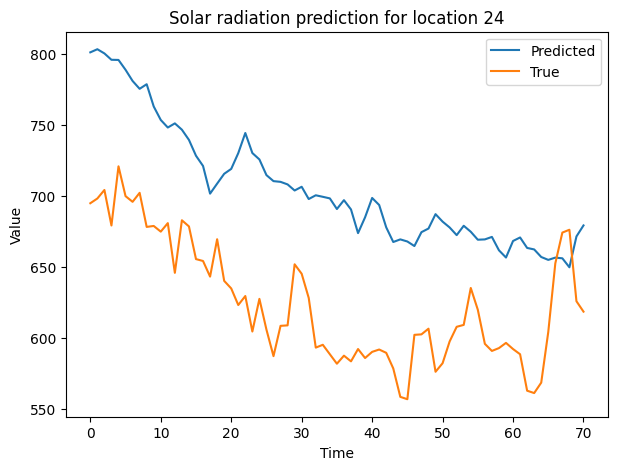

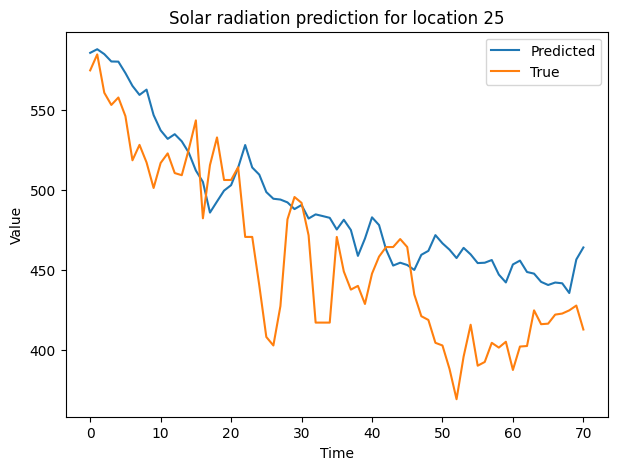

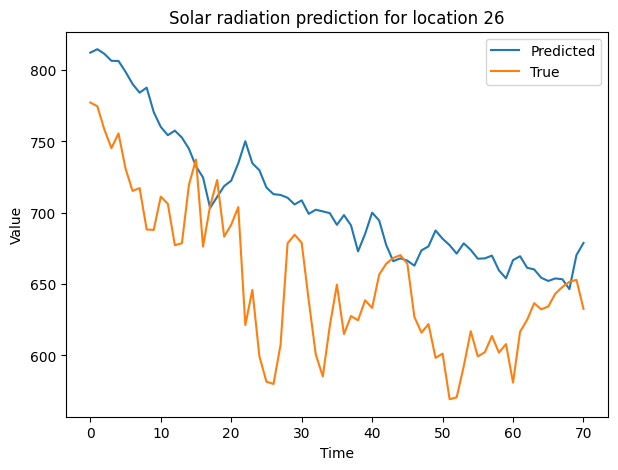

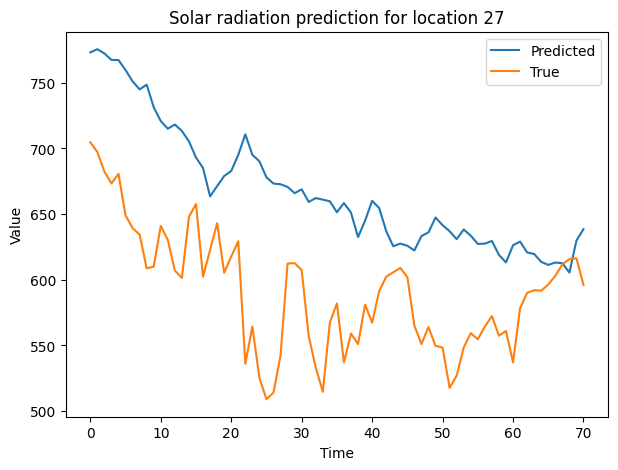

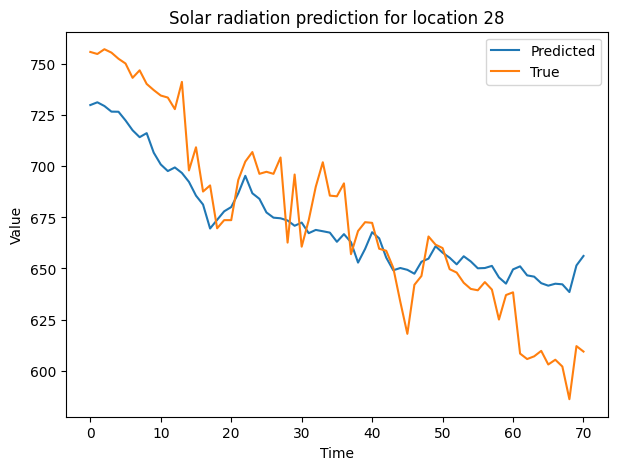

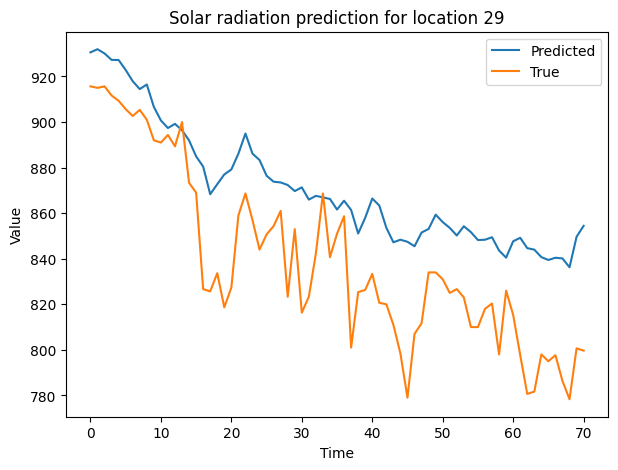

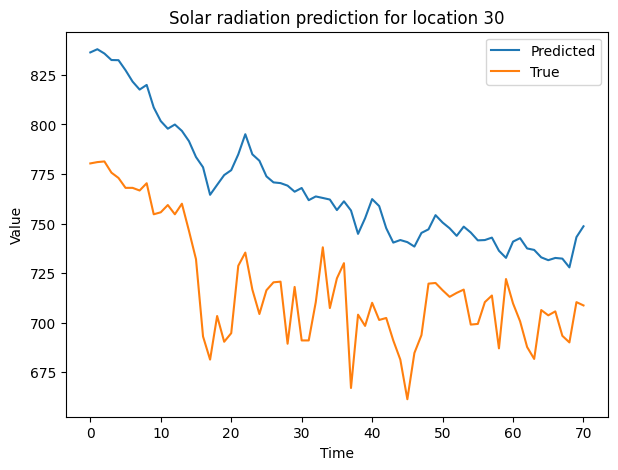

In [ ]:
epoch = 10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), :]
    dataX.append(a)
    dataY.append(dataset[i + look_back, :])
  return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

# normalize the dataset
scaler = MinMaxScaler()

for dataset_num in range(1):
  # load the dataset
  dataframe = pd.read_excel('Daywise Solar radiation.xlsx', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                                     11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                                                                     21, 22, 23, 24, 25, 26, 27, 28, 29, 30
                                                                     ])                                            # Asssign column number for all 10 locations
  dataset = dataframe.values
  dataset = dataset.astype('float32')
  dataset = scaler.fit_transform(dataset)

  # split into train and test sets
  train_size = 292
  test_size = 365 - train_size
  train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

  # reshape into X and Y
  look_back = 1
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  # reshape input to be [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
  testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

  # create and fit the LSTM network
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
  model.add(LSTM(50, return_sequences=True))
  model.add(LSTM(50, return_sequences=True))
  model.add(LSTM(50, return_sequences=True))
  model.add(LSTM(50))
  model.add(Dense(trainY.shape[1]))
  adam = tf.optimizers.Adam(lr=0.0001)
  model.compile(loss='mean_squared_error', optimizer=adam)
  model.fit(trainX, trainY, epochs=epoch, batch_size=32, verbose=2)

  # make predictions
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)

  # invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform(trainY)
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform(testY)

  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  # shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

  print(testPredict)

  # Save DataFrame to Excel with column names
  column_names = [
    'Location1_Dur1', 'Location1_Dur2', 'Location1_Dur3',
    'Location2_Dur1', 'Location2_Dur2', 'Location2_Dur3',
    'Location3_Dur1', 'Location3_Dur2', 'Location3_Dur3',
    'Location4_Dur1', 'Location4_Dur2', 'Location4_Dur3',
    'Location5_Dur1', 'Location5_Dur2', 'Location5_Dur3',
    'Location6_Dur1', 'Location6_Dur2', 'Location6_Dur3',
    'Location7_Dur1', 'Location7_Dur2', 'Location7_Dur3',
    'Location8_Dur1', 'Location8_Dur2', 'Location8_Dur3',
    'Location9_Dur1', 'Location9_Dur2', 'Location9_Dur3',
    'Location10_Dur1', 'Location10_Dur2', 'Location10_Dur3'
    ]

  df = pd.DataFrame(testPredict, columns=column_names)
  df.to_excel('Predicted solar radiation.xlsx', sheet_name='Predicted_SR', index=False)

  # Plot each prediction separately
  for i in range(testPredict.shape[1]):
    plt.figure(figsize=(7, 5))
    plt.plot(testPredict[:, i], label='Predicted')
    plt.plot(testY[:, i], label='True')
    plt.title(f'Solar radiation prediction for location {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
